# Описание проекта. Постановка цели, задачи, ход исследования.

Аналитиком крупного интернет-магазина совместно с отделом маркетинга был подготовлен список гипотез **для увеличения выручки**.<br>
Нам предстоит приоритизировать гипотезы для запуска А/Б теста, и **выбрать лучшую гипотезу, запустить A/B-тест и проанализировать результаты**, а так же принять решение о продолжении или завершении теста.

**Ход исследования:**    

Часть 1. Приоритизация гипотез.<br>
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
* Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
* Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
* Выясним, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Часть 2. Анализ A/B-теста<br>
Проведён A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача
Проанализируем A/B-тест:
* Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
* Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
* Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
* Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
* Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
* Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
* Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
* Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Примем одно из решений по результатам теста и объясним его. Варианты возможных решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Описание данных

В нашем распоряжении три датасета: <br>

- В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. <br>
  Структура: <br>
  * Hypothesis — краткое описание гипотезы;
  * Reach — охват пользователей по 10-балльной шкале;
  * Impact — влияние на пользователей по 10-балльной шкале;
  * Confidence — уверенность в гипотезе по 10-балльной шкале;
  * Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
  
- В файле /datasets/orders.csv - результаты проведения А/Б теста, информация о заказах.<br>
  Структура:<br>
  * transactionId — идентификатор заказа;
  * visitorId — идентификатор пользователя, совершившего заказ;
  * date — дата, когда был совершён заказ;
  * revenue — выручка заказа;
  * group — группа A/B-теста, в которую попал заказ.
  
- В файле /datasets/visitors.csv - результаты проведения А/Б теста, информация о визитах.<br>
  Структура:<br>
  * date — дата;
  * group — группа A/B-теста;
  * visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка данных и подготовка к анализу

Изучим данные и выполним предобработку. Проверим есть ли в данных пропуски и дубликаты. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

In [1]:
# Импортируем библиотеки Pandas
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import plotly
from datetime import datetime, timedelta
import datetime as dt
import math as mth
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats

# отображать все столбцы датасета    
pd.set_option('display.max_columns', None)

# отображать все символы в полях
pd.set_option('display.max_colwidth', None)

In [2]:
# Cчитываем данные из csv-файла datasets/hypothesis.csv в датафрейм и сохраняем в переменную 'hypothesis'

try:
    hypothesis = pd.read_csv('C:\\Users\\Александр\\Downloads\\hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    
# Выводим на экран первые 10 строк
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Исправим название столбца, приведем к нижнему регистру 
hypothesis = hypothesis.rename(columns={'Hypothesis':'hypothesis', 'Reach':'reach', \
                                        'Impact':'impact', 'Confidence':'confidence', 'Efforts':'efforts'})

In [4]:
# Cчитываем данные из csv-файла datasets/orders.csv в датафрейм и сохраняем в переменную 'orders'

try:
    orders = pd.read_csv('C:\\Users\\Александр\\Downloads\\orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    
# Выводим на экран первые 10 строк
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [5]:
# Выведим основную информацию о датафрейме с помощью метода info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Видим, что поле дата имеет неверный тип данных, приведем столбец к нужному типу данных.

In [6]:
# Приведем столбец с датами в нужный тип
orders['date'] = pd.to_datetime(orders['date'])

In [7]:
# Исправим название столбцов, приведем к змеиному типу 
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

In [8]:
# Проверим наличие пропусков в информации
pd.DataFrame(round(orders.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
transaction_id,0.000000
visitor_id,0.000000
date,0.000000
revenue,0.000000
group,0.000000


In [9]:
# Поиск полных дубликатов
orders.duplicated().sum()

0

In [10]:
# Минимальное значение дата заказа
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [11]:
# Максимальное значение дата заказа
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [12]:
# Cчитываем данные из csv-файла datasets/visitors.csv в датафрейм и сохраняем в переменную 'visitors'

try:
    visitors = pd.read_csv('C:\\Users\\Александр\\Downloads\\visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    
# Выводим на экран первые 10 строк
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [13]:
# Выведим основную информацию о датафрейме с помощью метода info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
# Приведем столбец с датами в нужный тип
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
# Проверим наличие пропусков в информации
pd.DataFrame(round(visitors.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date,0.000000
group,0.000000
visitors,0.000000


In [16]:
# Поиск полных дубликатов
visitors.duplicated().sum()

0

In [17]:
# Минимальное значение дата визита
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [18]:
# Максимальное значение дата визита
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Посчитаем суммарное число пользователей и заказов в каждой из групп теста. Сгруппируем данные по столбцу с группами A/B-теста методом groupby(), с аргументом as_index=False. Применим агрегирующие функции — найдём, сколько всего посетителей и заказов было в каждой группе:

In [19]:
# Количество визитов в каждой группе
visitors_sum_group = (
    visitors.groupby('group', as_index=False)
    .agg({'visitors': 'sum'})
)

visitors_sum_group

,group,visitors
0,A,18736
1,B,18916


In [20]:
# Количество и сумма заказов в каждой группе
orders_sum_group = (
    orders.groupby('group', as_index=False)
          .agg({'revenue': 'sum', 'visitor_id': 'count'})
)

orders_sum_group

,group,revenue,visitor_id
0,A,4084803,557
1,B,5907760,640


In [21]:
# Средняя сумма заказа в каждой группе
orders_sum_group['orders_sum_mean'] = (
    orders_sum_group['revenue'] / orders_sum_group['visitor_id']
).map(lambda x: "{0:.2f}".format(x))

orders_sum_group 

,group,revenue,visitor_id,orders_sum_mean
0,A,4084803,557,7333.58
1,B,5907760,640,9230.88


### Вывод по предобработке данных
Для анализа используются данные визитов и заказов с 1 августа 2019 по 31 августа 2019 года включительно. <br>
В данных нет пропусков и нет дубликатов. Столбцы с датами приведены в нужный тип данных. <br>
Данные уже поделены на две группы А и Б, но разделение произведено не равномерно. В группе А 18736 визитов, в группе Б 18916 визитов, отклонение составляет чуть меньше 1%, что является допустимым. Также группа Б больше по заказам 640 заказаов, против 557 заазов в группе А, отклонение составляет 15% и это существенная разница. Также мы видим, что средняя сумма заказа в группе В значительно выше, чем в греппе A, и составляет 7333,58 и 9230,88 соответсвенно.

Рассмотрим количество пользователей в каждой группе, используя данные из таблицы с заказами

In [22]:
# Количество пользователей в каждой группе
users_sum_group = (
    orders.groupby('group', as_index=False)
          .agg({'visitor_id': 'nunique'})
)

users_sum_group

,group,visitor_id
0,A,503
1,B,586


По данным группировочной таблицы, мы видим, что пользователи разделены по группам не равномерно и распределение имеет существунное отклонение, выборки имеют разный размер, группа В больше группы А на 16,5%, что очень сильно повлияет на результаты А/Б теста. <br>
Чтобы избежать таких проблем, необходимо перед проведенеим А/Б тестирования провести А/А тест, с помощью которого проверяется корректность деления пользователей на группы. <br>
Второй важный критерий для корретного анализа А/Б теста, это уникальность пользователей. Пользователь попавший в группу А, не должен попадать в группу Б, иначе невозмоно достоверно сказать какой из увиденных пользователем версий повлиял на его решение о покупке.<br>

In [23]:
# Проверим сколько пользователей встречаются в обеих группах
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

58 пользователей встречаются в обеих группах, для наших выборок это большое значение, около 10% данных непонятно как интерпретировать. К какой все таки группе можно отнести этих пользователей? Мы достоверно определеить не можем, ведь невозможно определеить какую версию сайта он видели в момент оформленя заказа.<br>
По большому счету результаттам такого А/Б тестирования верить нельзя. <br>

Можно было бы как-то спасти ситуацию и удалить таких пользователей из обеих групп, как буд-то бы они вообще не участвовали в А/Б тестировании, но сделать мы этого не можем, поскольку удалив этих пользователей из таблицы с заказами orders, мы не сможем удалить их из таблицы с визитами visitors, поскольку у нас нет там иденификаторов пользователей. Сделать мердж этих двух таблиц так же не получится.<br>

Всех этих проблем можно было бы избежать проведя А/А тест.

Посмотрим динамику посещений по дням и по группам.

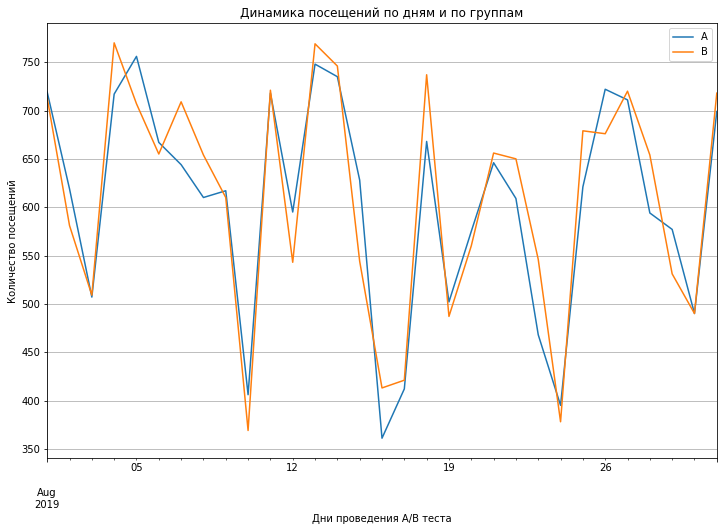

In [24]:
# Диаграмма размаха визитов по дням и по группам
visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='sum') \
        .plot(grid=True, figsize=(12, 8))
plt.title('Динамика посещений по дням и по группам')
plt.ylabel('Количество посещений')
plt.xlabel('Дни проведения А/B теста')
plt.legend() 
plt.show()

По графику посещений мы видим, что на поведение пользователей никак не влияет проведение А/Б тестирования. Графиики повторяют друг друга практически как тени. За исключением двух дней. 16 августа в группе А был провал в посещениях до минимального уровня 360 визитов, и 13 августа был пик посещений в группе В до уровня 760 посещений.
Нововедения проводимые для пользователей группы В не дают дополнительных посещений сайта.

## Приоритизация гипотез

В нашем датафрейме есть 9 гипотез, чтобы не тратить ценные ресурсы (время и деньги) попусту, выберем лучшую гипотезу для проведения А/Б теста в первую очередь. <br>
Для приоритизации гипотез будем исрользовать метод ICE и RICE.

In [25]:
# Создадим столбец ICE и отсортируем гипотезы по убыванию этого значения
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Мы видим, что наиболее приоритетные гипотезы по ICE, это:
    
    1. Запустить акцию, дающую скидку на товар в день рождения   
    2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
    3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  

In [26]:
# Создадим столбец RICE и отсортируем гипотезы по убыванию этого значения
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Мы видим, что наиболее приоритетные гипотезы по RICE, это:
    
    1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
    3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    
Причем первая гипотеза лидирует с большим отрывом.

### Вывод

Самая лучшая гипотеза по ICE под номером 8 оказалась на пятом месте при расчете RICE. Это объясняется показателем reach - количество пользователей, которое затронет изменение. Это важный показатель, поскольку тратить ресурсы имеет смысл сперва на самые значимые гипотезы, которые могут затронуть больше всего пользователей и принести смамый лучший экономический эффект.

* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 

## Анализ A/B-теста

## Проверка гипотезы о равенстве долей

Cравним доли клиентов, сделавших заказ. Из 18736 визитов, группы А, заказов 557; а из 18916 визитов, группы В - 640 заказаов.
Можно ли сделать вывод о разнице в конверсии посещения в заказ для этих двух групп?

In [27]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([557, 640])
trials = np.array([18736, 18916])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

In [28]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

In [29]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между долями есть значимая разница


Такая разница в пропорциях при указанных размерах выборок достаточна, чтобы говорить о статистически значимом различии.

### График кумулятивной выручки по группам

In [30]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях 
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

display(cumulative_data.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [31]:
# Проверим минимальную и максимальную дату в датафрейме
display(f'''Минимальная дата в новом датафрейме: {cumulative_data['date'].min()}''')
display(f'''Максимальная дата в новом датафрейме: {cumulative_data['date'].max()}''')

'Минимальная дата в новом датафрейме: 2019-08-01 00:00:00'

'Максимальная дата в новом датафрейме: 2019-08-31 00:00:00'

Новый датафрейм создан корректно, даты А/В теста совпадают с датами в исходных данных.

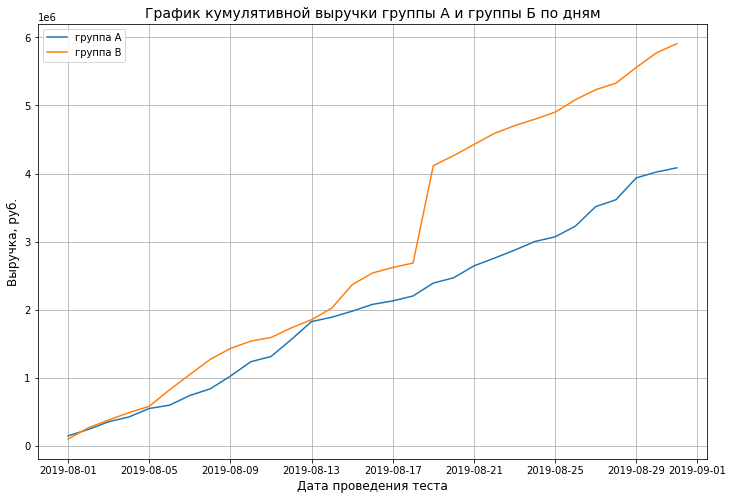

In [32]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]

# задаём размер для графиков
plt.figure(figsize=(12, 8))

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='группа A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='группа B')

plt.grid(visible=True)
plt.title('График кумулятивной выручки группы А и группы Б по дням', fontsize=14)
plt.xlabel('Дата проведения теста', fontsize=12)
plt.ylabel('Выручка, руб.', fontsize=12)
plt.legend() 
plt.show()

**Вывод:** <br>
Из данных графика видно, что выручка в интернет-магазине росла на протяжении всего месяца. Рост выручки в группе А, равномерный, а группа Б имеет резкий скачок размера выручки 18-19 августа. Это может быть связано с ростом числа заказов или с ростом суммы заказов. 

### График кумулятивного среднего чека по группам

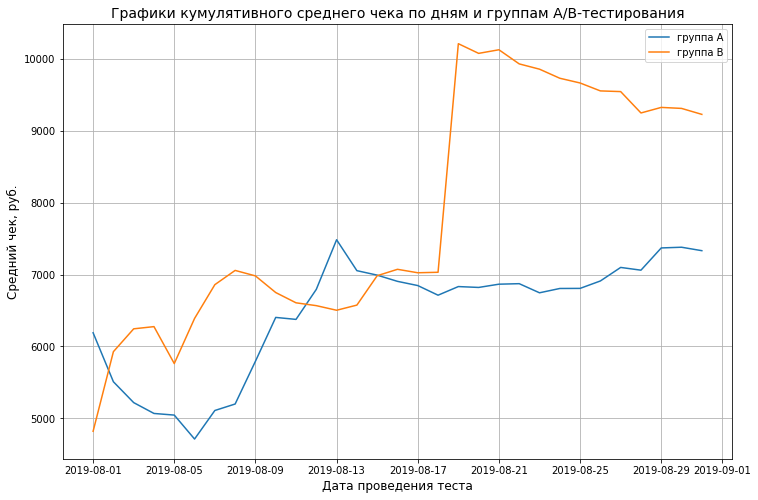

In [33]:
# График кумулятивного среднего чека в группе А и группе В
plt.figure(figsize=(12, 8))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], label='группа A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], label='группа B')

plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата проведения теста', fontsize=12)
plt.ylabel('Средний чек, руб.', fontsize=12)
plt.legend() 
plt.show()

**Вывод:** <br>
Графики среднего чека каждой из групп существенно различаются. <br>

Группа А в самом начале тетирования имела 6100 руб. более высокий средний чек, чем группа Б, но его уровень постоянно снижался  и примерно через неделю, 5-6 августа достиг своего минимума 4550 руб., это худший показатель из всех групп, но к 13 августа средний чек в группе А стабилизировался в диапазоне 6900 руб, к концу теста средний чек достиг уровня 7300 и стабилизировлся. <br>

Группа Б на начало теста имела средний чек на уровне 4800 руб., затем в течение первой недели наблюдался рост до 6200 руб, 04-05.08 было зафиксировано резкое снижение среднего чека до минимального уровня в этой группе 5900 руб. Затем продолжился рост и 18-19 августа зафиксирован резкий рост среднего чека в группе B до уровня 10200 руб., затем пошел спад к концу проведения теста, но уровень среднего чека в группе В зафиксирован выше 9200 руб.

Из графика видно, что средние чеки групп живут разной жизнью, но в начале месяца с 3 по 6 августа, в обеих группах набюдается резкое снижение среднего чека, необходимо выяснить с чем это могло быть сязано: технические проблемы интернет-магазина, проблемы с транзакциями или оплатой, либо что-то сезонное, выходные или празничные дни?
Также стоит обратить внимание на 18-19 августа в группе В резкое увеличение среднего чека, это может быть связано с ростом числа заказов или нескольких круных по сумме заказов, которые искажают данные.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

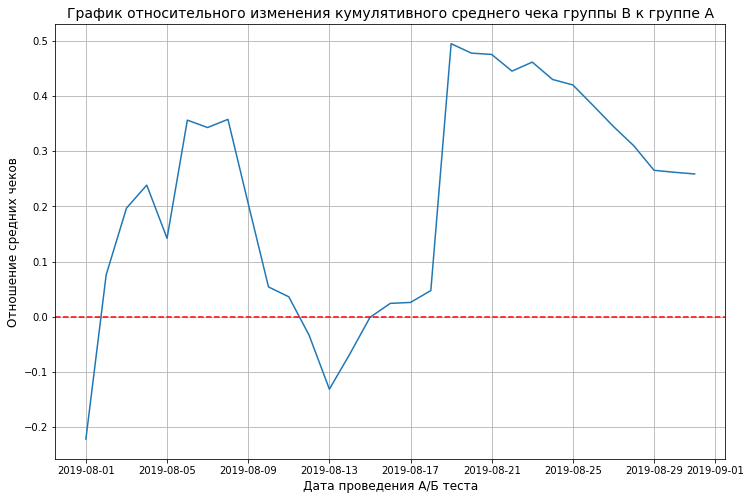

In [34]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(12, 8))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) /
         (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата проведения А/Б теста', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.show()

**Вывод:**
График отношения средних чеков имеет большие всплески, когда значения между чеками отличались максимально. Мы видим это с 6 по 8 августа, когда средние чеки каждой из групп падали и росли, и 18-19 августа, когда средний чек группы В показал свои максимальные значения более 10 тыс. руб. 

Средние чеки двух групп были равны только в трех точках 2 августа, 11 августа и 15 августа.
В осатльные же дни, средние чеки сужественно различались, что говорит о наличии крепных заказов или большого количества заказов в одной из групп.

### График кумулятивного среднего количества заказов на посетителя по группам

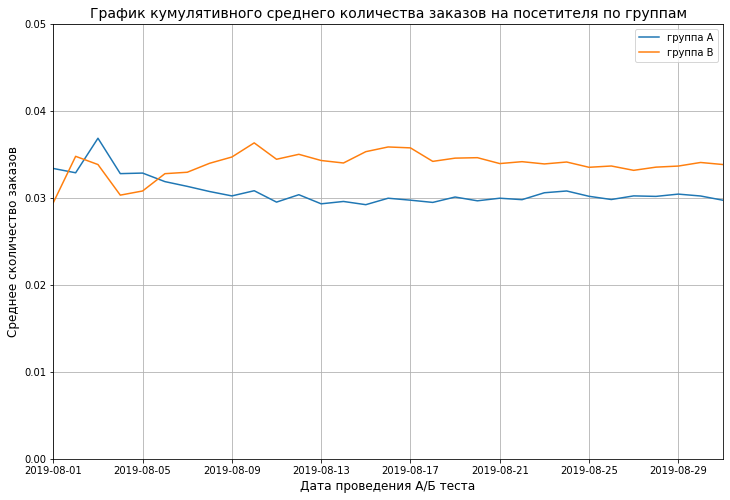

In [35]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

# считаем кумулятивное среднее количество заказов на посетителя 
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# задаём размер для графиков
plt.figure(figsize=(12, 8))

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='группа A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='группа B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]) 

plt.grid(visible=True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel('Дата проведения А/Б теста', fontsize=12)
plt.ylabel('Среднее сколичество заказов', fontsize=12)
plt.legend()
plt.show()


**Вывод:**
Из графика видно, что изначально среднее количество заказов в группе В было ниже чем в группе А, но с 6 августа, среднее количество заказов увеличилось и стабилизировалось на более высоком уровне чем группа А. В группе А, же всё наоборот, сперва уровень среднего количествва заказов был выше, затем снилился 06.08 и также стабилизировался.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

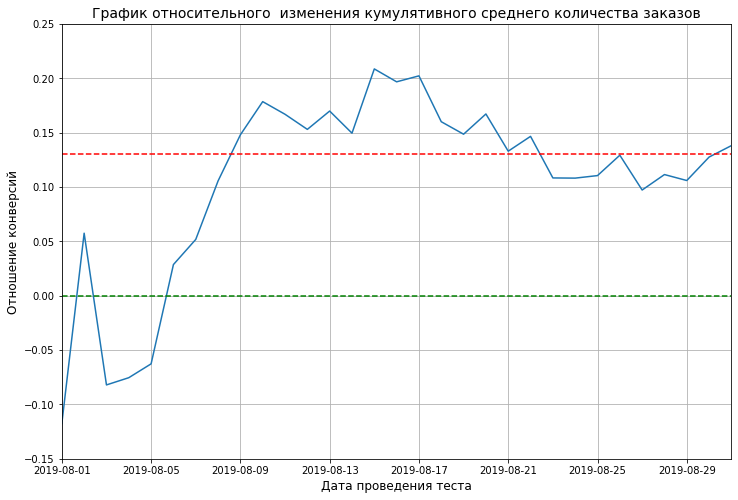

In [36]:
# объединяем данные обеих групп
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(12, 8))

# cтроим отношение конверсий
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversionB'] /
         merged_cumulative_conversions['conversionA']-1)

# добавляем оси X
plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=0.13, color='red', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.15, 0.25])

plt.grid(visible=True)
plt.title('График относительного  изменения кумулятивного среднего количества заказов', fontsize=14)
plt.xlabel('Дата проведения теста', fontsize=12)
plt.ylabel('Отношение конверсий', fontsize=12)
plt.show()

**Вывод:**
В начале теста конверсии двух групп сильно разичались, группа В проигывала группе А, но с 6.08 произошел рост и конверсия группы В больше чем группы А, и их соотношение стабилизировалось в районе 14%.

### Точечный график количества заказов по пользователям

Создадим таблицу с количеством заказов по пользователям, отсортируем по количеству транзакций. Посмотрим первые 10 пользователей с самым большим количеством заказов.

In [37]:
# число заказов(транзакций) по пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
          .agg({'transaction_id': 'nunique'})
          .sort_values(by='transaction_id', ascending=False)
          .rename(columns={'transaction_id': 'count_orders'})
)

orders_by_users.head(10)

,visitor_id,count_orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Видим, что у нас есть всего два пользователя с количеством заказов 11, и два пользователя с количеством заказов 8 и 9 шт., остальные пользователи имеют 5 заказов или меньше.<br>
Построим точечный график для наглядности.

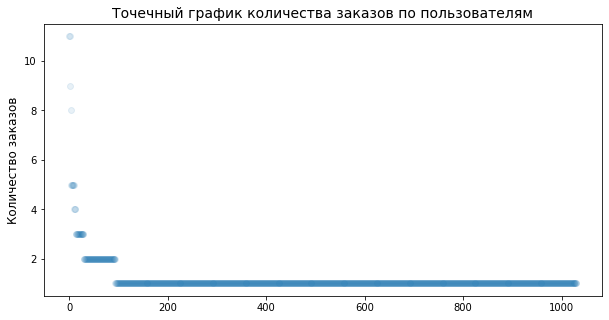

In [38]:
# график распределения заказов по пользователям
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users['count_orders'], alpha=0.1)
plt.title('Точечный график количества заказов по пользователям', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()

**Вывод:**
По графику хорошо видно, что подавляющее большинство пользователей имеют по 1 заказу, до 100 пользователей имеют 2 заказа, до 10 пользоваелей имеют 3 заказа, и 4 и более заказов имеют всего несколько пользователей.

### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [39]:
# Методом np.percentile('column', [percentile1, percentile2, percentile3]) находим перцентили
print(np.percentile(orders_by_users['count_orders'], [95, 99]))

[2. 4.]


**Вывод:**
В наших данных не более 5% пользователей имеют 2 и более заказа, и не более 1% пользователей имеют 4 и более заказа.
Значит можем брать 4 заказа за верхнюю границу количества заказов на пользователя, всё что больше можно считать редкими аномальными значениями. Это безусловно лучшие покупатели, но для А/Б теста их лучше не считать. Для них эффективнее всего сделать отдельную VIP категорию со специальными предложениями.

### Точечный график стоимостей заказов

In [40]:
# Посмотрим топ-20 заказов с самой большой суммой
orders.sort_values(by='revenue', ascending=False).head(20)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Мы нашли один очень дорогой заказ свыше 1 млн рублей, 1 заказ свыше 200 тыс рублей и свего около 10-ка заказов от 60 до 100 тыс рублей.
Наши данные явно содержат аномальные значения, установим границы аномалий, отбросим два самых дорогих заказа.

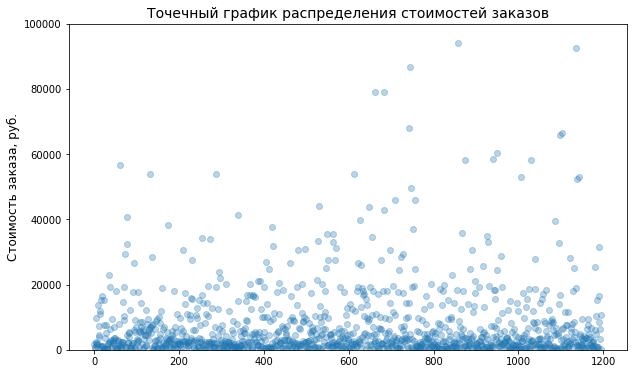

In [41]:
# строим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.ylim(0, 100000)
plt.title('Точечный график распределения стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость заказа, руб.', fontsize=12)
plt.show()

### 95-й и 99-й перцентили стоимости заказов. Границу для определения аномальных заказов.

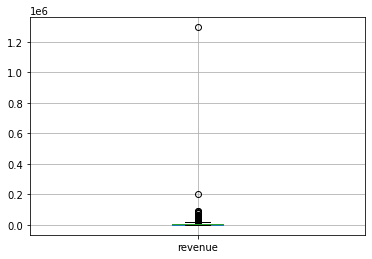

In [42]:
# Диаграмма размаха дохода
orders.boxplot(column='revenue')
plt.show()

In [43]:
# Методом np.percentile('column', [percentile1, percentile2, percentile3]) находим перцентили
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод:**
В наших данных не более 5% заказов имеют сумму свыше 28 тыс рублей, и не более 1% заказов имеют сумму свыше 58 тыс рублей. Отсекаем эти заказы для анализа. Большинство заказов имеют сумму до 28 тыс рублей.

### Стат. значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: разколичествеличий в среднем заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [44]:
# расчет количества пользователей в выбранную дату в группе А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# расчет количества пользователей до выбранной даты включительно в группе А
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# расчет количества пользователей в выбранную дату в группе В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# расчет количества пользователей до выбранной даты включительно в группе В
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# расчет количества заказов и суммарной выручки в выбранную дату в группе A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# расчет суммарного числа заказов до выбранной даты включительно в группе A
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# расчет количества заказов и суммарной выручки в выбранную дату в группе В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# расчет суммарного числа заказов до выбранной даты включительно в группе В
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

# объединение датафреймов в один общий
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Напомним названия столбцов данных:
* date - дата;
* orders_per_date_a - количество заказов в выбранную дату в группе A;
* revenue_per_date_a - суммарная выручка в выбранную дату в группе A;
* orders_per_date_b - количество заказов в выбранную дату в группе B;
* revenue_per_date_b - суммарная выручка в выбранную дату в группе B;
* orders_cummulative_a - суммарное число заказов до выбранной даты включительно в группе A;
* revenue_cummulative_a - суммарная выручка до выбранной даты включительно в группе A;
* orders_cummulative_b - суммарное число заказов до выбранной даты включительно в группе B;
* revenue_cummulative_b - суммарная выручка до выбранной даты включительно в группе B;
* visitors_per_date_a - количество пользователей в выбранную дату в группе A;
* visitors_cummulative_a - количество пользователей до выбранной даты включительно в группе A;
* visitors_per_date_b - количество пользователей в выбранную дату в группе B;
* visitors_cummulative_b - количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [45]:
# формирование датафреймов в которых указано число совершённых заказов
# для пользователей, которые заказывали хотя бы 1 раз
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

# формирование переменных в которых пользователям с заказами
# будет соответствовать число заказов пользователя,
# а пользователям без заказов — нули
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_a'].sum() -
                          len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_b'].sum() -
                          len(orders_by_users_b['orders'])), name='orders')], axis=0)

# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «сырым» данным:',
      '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.017
Относительное различие в средней конверсии между группами по «сырым» данным: 0.138


**Вывод:**
p-value = 0.017, что меньше 0.05. Значит нулевую гипотезу об отсутствии различий по «сырым» данным в конверсии между группами можно отвергнуть. Средняя конверсия группы В больше средней конверсии группы А.

### Стат. значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:

*H₀* - различий в среднем чеке между группами нет; *H₁* - различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. Найдём относительные различия в среднем чеке между группами.

In [46]:
# рассчет статистической значимости различия среднего чека по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]))

# рассчет относительного различия в среднем чеке между группами
print('Относительное различие в среднем чеке между группами по «сырым» данным:',
      '{0:.3f}'.format(
          orders[orders['group']=='B']['revenue'].mean()/
          orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительное различие в среднем чеке между группами по «сырым» данным: 0.259


**Вывод:**
p-value = 0.729, что больше 0.05. Значит, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы В сильно больше среднего чека группы А.

### Стат. значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее мы нашли, что 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказам на пользователя.

Возьмем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей и запишем это в переменных many_orders и expensive_orders. Тем самым мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 28 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users. А также узнаем, сколько всего аномальных пользователей методом shape().

In [47]:
many_orders = np.percentile(orders_by_users['count_orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)
users_with_many_orders = pd.concat([
    orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
    orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id']], axis=0)
users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']
abnormal_users = (pd.concat([
    users_with_many_orders,
    users_with_expensive_orders], axis=0)
                  .drop_duplicates()
                  .sort_values())

print(abnormal_users.head())
print('\n')
print('Количество аномальных пользователей:', abnormal_users.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64


Количество аномальных пользователей: 15


**Вывод:**
Нужно понять, как эти 15 пользователей могли повлиять на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

Гипотезы:
H₀ - различий в конверсии между группами нет;
H₁ - различия в конверсии между группами есть.

In [48]:
sample_a_filtered = pd.concat([
    orders_by_users_a[np.logical_not(
        orders_by_users_a['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -
                                 len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b_filtered = pd.concat([
    orders_by_users_b[np.logical_not(
        orders_by_users_b['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                 len(orders_by_users_b['orders'])), name='orders')], axis=0)

# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «очищенным» данным:',
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value = 0.014
Относительное различие в средней конверсии между группами по «очищенным» данным: 0.153


**Вывод:**
p-value = 0.014, что меньше 0.05. Это означает, что нулевую гипотезу об отсутствии различий по «очищенным» данным в конверсии между группами можно отвергнуть. По «сырым» данным p-value был равен 0.017. Средняя конверсия группы В больше средней конверсии группы А. Относительное различие в конверсии между группами по «сырым» данным было равно 0.153. Результаты по «очищенным» данным незначительно отличаются от результатов по «сырым» данным.

### Стат. значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Сформулируем гипотезы:

H₀ - различий в среднем чеке между группами нет; H₁ - различия в среднем чеке между группами есть.

Передадим критерию mannwhitneyu() данные о выручке с заказов без учета аномальных пользователей и также найдём относительные различия в среднем чеке между группами.

In [49]:
print('p-value =',
      '{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'], 
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'])[1]))

print('Относительное различие в среднем чеке между группами по «очищенным» данным:',
      '{0:.3f}'.format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() - 1))

p-value = 0.851
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.006


**Вывод:**
p-value = 0.851, что значительно больше 0.05. Это означает, что причин отвергать нулевую гипотезу и считать, что в среднем чеке по «очищенным» данным есть различия, нет. По «сырым» данным p-value был равен 0.729. Однако по «очищенным» данным средний чек группы А больше среднего чека группы В. По «сырым» данным было наоборот, относительное различие в среднем чеке между группами составляло -0.006.

## Вывод решение по результатам теста

По результатам проведенного анализа А/В теста, нельзя принимать решение поскольку оно может быть ошибочным. <br>
Изначально не был проведен А/А тест, не было проверки на правильность деления пользователей на группы, в результате чего 58 пользователей, а это порядка 10% данных, "гуляли" по двум группам, что повлияло на их решение о покупке достоверно сказать нельзя. Проведение А/Б теста никак не повлияло на визиты пользователей на сайт, график посещенеий обоих групп очень схож.
В результате я бы рекомендовала остановить этот тест и начать его заново, но проверив базовые принципы и правила проведения А/Б теста.